## Questions
This test exercise uses data that are available in the data file TestExer6. The question of interest is to model monthly inflation in the Euro area and to investigate whether inflation in the United States of America has predictive power for inflation in the Euro area. Monthly data on the consumer price index (CPI) for the Euro area and the USA are
available from January 2000 until December 2011. The data for January 2000 until December 2010 are used for
specification and estimation of models, and the data for 2011 are left out for forecast evaluation purposes.

(a) Make time series plots of the CPI of the Euro area and the USA, and also of their logarithm log(CPI) and of
the two monthly inflation series DP = ∆log(CPI). What conclusions do you draw from these plots?


**ans:** 

1. cointegration may happens between CPI of the Euro and USA area also of their logarithm log(CPI)
2. LOG CPI and CPI might not be stationary 
3. DP might be stationary

In [1]:
%matplotlib inline
import sys
sys.path.append('/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3')
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from xforex.BackTesting.econometrics_tools import Econometrics_Tool
import numpy as np
import pprint as pp
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.ar_model import AR
import pandas 
from dateutil.relativedelta import relativedelta

dat = pd.read_csv(
        '/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3/training/econometrics/week6-time-series/Test6-CPI-round1.txt',sep = '\t')

def get_date_index():
    start = datetime.strptime("01-2000", "%m-%Y")
    end = datetime.strptime("12-2011", "%m-%Y")
    date_generated = []
    date = start 
    date_generated.append(date)
    while date < end:
        date = date + relativedelta(months=1)
        date_generated.append(date)
    return date_generated

dat.index = pd.Index(get_date_index())
dat.head()

,YEAR,TREND,CPI_EUR,CPI_USA,LOGPEUR,LOGPUSA,DPEUR,DPUSA
2000-01-01,2000M01,1,105.1,107.6,4.654912,4.678421,NaN,NaN
2000-02-01,2000M02,2,105.4,108.3,4.657763,4.684905,0.002850,0.006485
2000-03-01,2000M03,3,105.8,109.1,4.661551,4.692265,0.003788,0.007360
2000-04-01,2000M04,4,105.9,109.2,4.662495,4.693181,0.000945,0.000916
2000-05-01,2000M05,5,106.0,109.3,4.663439,4.694096,0.000944,0.000915


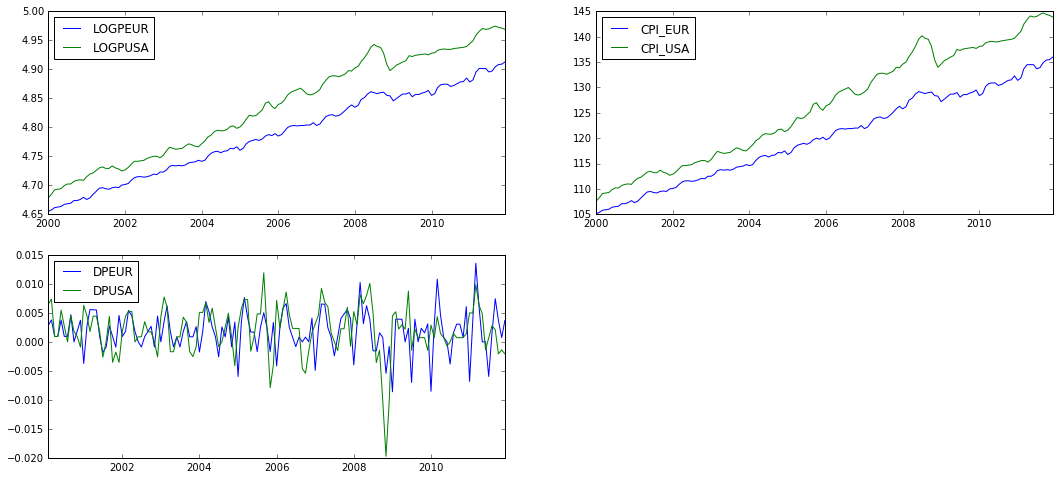

In [2]:
plt.figure(1, figsize=(18, 8))
plt.subplot(2,2,1)
plt.plot(dat.index,dat['LOGPEUR'],label = 'LOGPEUR')
plt.plot(dat.index,dat['LOGPUSA'],label = 'LOGPUSA')
plt.legend(loc='best')

plt.figure(1, figsize=(18, 8))
plt.subplot(2,2,2)
plt.plot(dat.index,dat['CPI_EUR'],label = 'CPI_EUR')
plt.plot(dat.index,dat['CPI_USA'],label = 'CPI_USA')
plt.legend(loc='best')

plt.figure(1, figsize=(18, 8))
plt.subplot(2,2,3)
plt.plot(dat.index,dat['DPEUR'],label = 'DPEUR')
plt.plot(dat.index,dat['DPUSA'],label = 'DPUSA')
plt.legend(loc='best')

(b) Perform the Augmented Dickey-Fuller (ADF) test for the two log(CPI) series. In the ADF test equation, include
a constant (α), a deterministic trend term (βt), three lags of DP = ∆log(CPI) and, of course, the variable of
interest log(CPIt−1). Report the coefficient of log(CPIt−1) and its standard error and t-value, and draw your
conclusion.

**ans:**:

p-value for LOGPEUR: 0.19, p-value for LOGPUSA: 0.22, which indicate coefficient of log(CPIt−1) is not significate at 5% level. Therefore, the null hypothesis is rejected. Both LOGPUSA and LOGPEUR are not stationary. Check below for details 

In [3]:
result = {}

# EUROP
result['LOGPEUR'] = ts.adfuller(dat['LOGPEUR'], regression = 'ct', maxlag = 3, autolag = None) # maxlag is now set to 3
result['LOGPUSA'] = ts.adfuller(dat['LOGPUSA'], regression = 'ct', maxlag = 3, autolag = None) # maxlag is now set to 3
pp.pprint(result)

{'LOGPEUR': (-2.8263432452941988,
             0.18743718231598833,
             3,
             140,
             {'1%': -4.0249342984693879,
              '10%': -3.1457269825072887,
              '5%': -3.4423275561224487}),
 'LOGPUSA': (-2.7344718644272716,
             0.222050078484473,
             3,
             140,
             {'1%': -4.0249342984693879,
              '10%': -3.1457269825072887,
              '5%': -3.4423275561224487})}


(c) As the two series of log(CPI) are not cointegrated (you need not check this), we continue by modelling the
monthly inflation series DPEUR = ∆log(CPIEUR) for the Euro area. Determine the sample autocorrelations
and the sample partial autocorrelations of this series to motivate the use of the following AR model: 

$$DPEUR_t = α+β_1DPEUR_{t−6} +β_2DPEUR_{t−12} +ε_t $$

Estimate the parameters of this model (sample Jan 2000 - Dec 2010)

**ans:**:

As shown in the figures below, both autocorrelation and partial autocorrelations are significat for lag 6 and lag 12. Therefore we could use the AR model with lag6 and lag12.


$$DPEUR_t = 0.0004 + 0.1887*DPEUR_{t−6} + 0.5980*DPEUR_{t−12} +ε_t $$

In [4]:
dat_sample = dat['2000-01':'2010-12']
dat_sample.tail()

,YEAR,TREND,CPI_EUR,CPI_USA,LOGPEUR,LOGPUSA,DPEUR,DPUSA
2010-08-01,2010M08,128,130.6,139.2,4.872139,4.935912,0.001533,0.001438
2010-09-01,2010M09,129,131.0,139.3,4.875197,4.936630,0.003058,0.000718
2010-10-01,2010M10,130,131.4,139.4,4.878246,4.937347,0.003049,0.000718
2010-11-01,2010M11,131,131.5,139.5,4.879007,4.938065,0.000761,0.000717
2010-12-01,2010M12,132,132.3,139.7,4.885072,4.939497,0.006065,0.001433


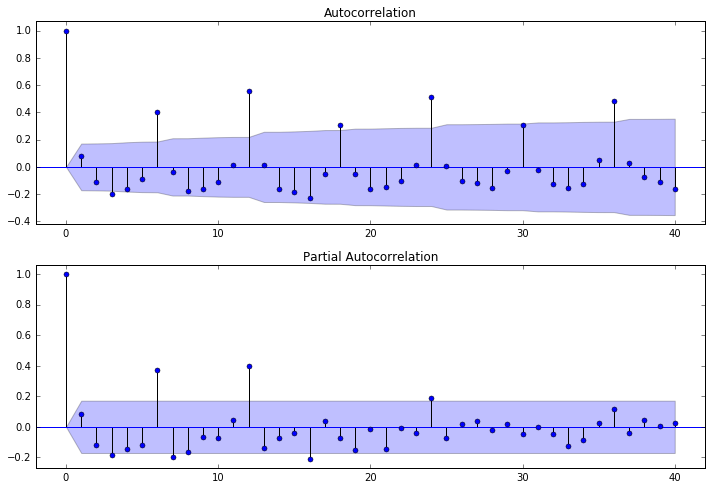

In [5]:
import statsmodels.api as sm

# plot
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
dat_sample_eur= dat_sample['DPEUR']
fig = sm.graphics.tsa.plot_acf(dat_sample_eur[1:].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dat_sample_eur[1:], lags=40, ax=ax2)

# result table
# r,q,p = sm.tsa.acf(dat_sample_eur[1:], qstat=True)
# data = np.c_[range(1,41), r[1:], q, p]
# table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
# print(table.set_index('lag'))

In [6]:
from statsmodels.tsa.tsatools import lagmat
DPEUR12 = lagmat(dat['DPEUR'], maxlag=12, trim ='Both')
DPEUR_lag12 = DPEUR12[:,11]
DPEUR_lag6 = DPEUR12[:,5]
X = pd.DataFrame({'lag6': DPEUR_lag6, 'lag12': DPEUR_lag12})[1:]
X = sm.add_constant(X)
y = dat['DPEUR'][13:]

X.index = y.index
X = X['2000-01':'2010-12']
y = y['2000-01':'2010-12']
ar_model = sm.OLS(y, X).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DPEUR   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     42.55
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           1.38e-14
Time:                        16:46:11   Log-Likelihood:                 542.43
No. Observations:                 119   AIC:                            -1079.
Df Residuals:                     116   BIC:                            -1071.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0004      0.000      1.365      0.175        -0.000     0.001
lag12          0.5980      0.084      7.157      0.000         0.432     0.763
lag6           0.1887      0.077      2.442      0.016         0.036     0.342
==============================================================================
Omnibus:                       10.599   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.700
Skew:                          -0.321   Prob(JB):                     5.27e-05
Kurtosis:                       4.887   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(d) Extend the AR model of part (c) by adding lagged values of monthly inflation in the USA at lags 1, 6,
and 12. Check that the coefficient at lag 6 is not significant, and estimate the ADL model 
$$ DPEUR_t =
α + β_1DPEUR_{t−6} + β_2DPEUR_{t−12} + γ_1DPUSA_{t−1} + γ_2DPUSA_{t−12} + ε_t $$
(sample Jan 2000 - Dec 2010).

**ans:**

p-value for lag6 is 0.3, not siginicant at 5% level.

The adl model is 
$$ DPEUR_t =
α + 0.1687* DPEUR_{t−6} + 0.6552*DPEUR_{t−12} + 0.2326*DPUSA_{t−1} -0.2265* DPUSA_{t−12} + ε_t $$


In [7]:
# europ
DPEUR12 = lagmat(dat['DPEUR'], maxlag=12, trim ='Both')
DPEUR_lag12 = DPEUR12[:,11]
DPEUR_lag6 = DPEUR12[:,5]


# usa
DPUSA12 = lagmat(dat['DPUSA'], maxlag=12, trim ='Both')
usa_lag1 =  DPUSA12[:,0]
usa_lag12 = DPUSA12[:,11]
usa_lag6 = DPUSA12[:,5]

X = pd.DataFrame({'eur_lag6': DPEUR_lag6, \
                  'eur_lag12': DPEUR_lag12,\
                 'usa_lag1': usa_lag1,\
                 'usa_lag12': usa_lag12,\
                 'usa_lag6': usa_lag6})[1:]

X = sm.add_constant(X)
y = dat['DPEUR'][13:]
X.index = y.index
X = X['2000-01':'2010-12']
y = y['2000-01':'2010-12']
adl_model = sm.OLS(y, X).fit()
adl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DPEUR   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     28.79
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           9.84e-19
Time:                        16:46:11   Log-Likelihood:                 558.57
No. Observations:                 119   AIC:                            -1105.
Df Residuals:                     113   BIC:                            -1088.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0004      0.000      1.545      0.125        -0.000     0.001
eur_lag12      0.6367      0.087      7.279      0.000         0.463     0.810
eur_lag6       0.2030      0.079      2.584      0.011         0.047     0.359
usa_lag1       0.2264      0.051      4.429      0.000         0.125     0.328
usa_lag12     -0.2300      0.054     -4.247      0.000        -0.337    -0.123
usa_lag6      -0.0561      0.055     -1.024      0.308        -0.165     0.052
==============================================================================
Omnibus:                       10.601   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.289
Skew:                           0.443   Prob(JB):                     0.000479
Kurtosis:                       4.517   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# europ
DPEUR12 = lagmat(dat['DPEUR'], maxlag=12, trim ='Both')
DPEUR_lag12 = DPEUR12[:,11]
DPEUR_lag6 = DPEUR12[:,5]


# usa
DPUSA12 = lagmat(dat['DPUSA'], maxlag=12, trim ='Both')
usa_lag1 =  DPUSA12[:,0]
usa_lag12 = DPUSA12[:,11]
usa_lag6 = DPUSA12[:,5]

X = pd.DataFrame({'eur_lag6': DPEUR_lag6, \
                  'eur_lag12': DPEUR_lag12,\
                 'usa_lag1': usa_lag1,\
                 'usa_lag12': usa_lag12})[1:]

X = sm.add_constant(X)
y = dat['DPEUR'][13:]
X.index = y.index
X = X['2000-01':'2010-12']
y = y['2000-01':'2010-12']
adl_model = sm.OLS(y, X).fit()
adl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DPEUR   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     35.71
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           2.55e-19
Time:                        16:46:11   Log-Likelihood:                 558.02
No. Observations:                 119   AIC:                            -1106.
Df Residuals:                     114   BIC:                            -1092.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0003      0.000      1.267      0.208        -0.000     0.001
eur_lag12      0.6552      0.086      7.651      0.000         0.486     0.825
eur_lag6       0.1687      0.071      2.374      0.019         0.028     0.310
usa_lag1       0.2326      0.051      4.582      0.000         0.132     0.333
usa_lag12     -0.2265      0.054     -4.189      0.000        -0.334    -0.119
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               15.792
Skew:                           0.386   Prob(JB):                     0.000372
Kurtosis:                       4.609   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(e) Use the models of parts (c) and (d) to make two series of 12 monthly inflation forecasts for 2011. At each month, you should use the data that are then available, for example, to forecast inflation for September 2011
you can use the data up to and including August 2011. However, do not re-estimate the model and use the coefficients as obtained in parts (c) and (d). For each of the two forecast series, compute the values of the root
mean squared error (RMSE), mean absolute error (MAE), and the sum of the forecast errors (SUM). Finally, give your interpretation of the outcomes.
**ans:**
 
See the cell below for the results. 

In [12]:
DPEUR12 = lagmat(dat['DPEUR'], maxlag=12, trim ='Both')
DPEUR_lag12 = DPEUR12[:,11]
DPEUR_lag6 = DPEUR12[:,5]
X = pd.DataFrame({'lag6': DPEUR_lag6, 'lag12': DPEUR_lag12})[1:]
X = sm.add_constant(X)
y = dat['DPEUR'][13:]
X.index = y.index
ar_y_fitted = ar_model.predict(X['2011-01':'2011-12'])

In [13]:
adl_model.summary()

# europ
DPEUR12 = lagmat(dat['DPEUR'], maxlag=12, trim ='Both')
DPEUR_lag12 = DPEUR12[:,11]
DPEUR_lag6 = DPEUR12[:,5]


# usa
DPUSA12 = lagmat(dat['DPUSA'], maxlag=12, trim ='Both')
usa_lag1 =  DPUSA12[:,0]
usa_lag12 = DPUSA12[:,11]
usa_lag6 = DPUSA12[:,5]

X = pd.DataFrame({'eur_lag6': DPEUR_lag6, \
                  'eur_lag12': DPEUR_lag12,\
                 'usa_lag1': usa_lag1,\
                 'usa_lag12': usa_lag12})[1:]

X = sm.add_constant(X)
y = dat['DPEUR'][13:]
X.index = y.index
adl_y_fitted = adl_model.predict(X['2011-01':'2011-12'])

In [11]:
import math
from tabulate import tabulate

def rmse(y_fitted, y_true):
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return math.sqrt(sum((sub)**2)/len(y_fitted))
def mae(y_fitted, y_true):
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return sum(abs(sub)/len(y_fitted))

def SumOfError(y_fitted, y_true):
    '''
    sum of forcast errors
    '''
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return sum(sub)

y_true = y['2011-01':'2011-12']

adl_metrics = [rmse(adl_y_fitted, y_true), mae(adl_y_fitted, y_true), SumOfError(adl_y_fitted, y_true)]
ar_metrics = [rmse(ar_y_fitted, y_true), mae(ar_y_fitted, y_true), SumOfError(ar_y_fitted, y_true)]

metrics = pd.DataFrame({'adl': adl_metrics,'ar': ar_metrics})
metrics.index = ['RMSE','MAE', 'SUM']
metrics

,adl,ar
RMSE,0.002111,0.002324
MAE,0.001404,0.001693
SUM,-0.000478,-0.005065
